In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
from matplotlib import pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator 

# 加载数据

In [2]:
# 整行读取，并将列名命名为Items
df = pd.read_csv('./data/Market_Basket_Optimisation.csv', 
                 sep='\t', # 整行读入
                 header=None, # CSV中第一行不作为columns
                 names=['Items'], # 对列索引进行命名
                )
df.head()

,Items
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."


# 数据预处理

In [3]:
# 将逗号分隔符后面的空格替换掉
df['Items'] = df['Items'].str.replace(', ', ',')
df

,Items
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."
...,...
7496,"butter,light mayo,fresh bread"
7497,"burgers,frozen vegetables,eggs,french fries,ma..."
7498,chicken
7499,"escalope,green tea"


In [5]:
# 将以空格分开的商品名称用下划线连接在一起，如：green grapes -> green_grapes
df['Items'] = df['Items'].str.replace(' ', '_')

df.head(2)

,Items
0,"shrimp,almonds,avocado,vegetables_mix,green_gr..."
1,"burgers,meatballs,eggs"


In [6]:
# 练习str.contains()方法，确认下是否还包含空格
df['Items'].str.contains(pat=' ')

0       False
1       False
2       False
3       False
4       False
        ...  
7496    False
7497    False
7498    False
7499    False
7500    False
Name: Items, Length: 7501, dtype: bool

In [7]:
# 如果有空格，统计下包含空格的样本数
df['Items'].str.contains(pat=' ').sum()

0

In [8]:
# 将逗号分隔符替换为空格分隔符，因为词云是用空格分词
df['Items'] = df['Items'].str.replace(',', ' ')
df

,Items
0,shrimp almonds avocado vegetables_mix green_gr...
1,burgers meatballs eggs
2,chutney
3,turkey avocado
4,mineral_water milk energy_bar whole_wheat_rice...
...,...
7496,butter light_mayo fresh_bread
7497,burgers frozen_vegetables eggs french_fries ma...
7498,chicken
7499,escalope green_tea


In [9]:
# 将每一行的字符串拼接成一个大字符串，空格隔开
# 因为词云会根据空格分词统计，所以将字符串中的逗号用空格隔开

text = df['Items'].str.cat(sep=' ')

In [10]:
text[:100]

'shrimp almonds avocado vegetables_mix green_grapes whole_weat_flour yams cottage_cheese energy_drink'

# 绘制100个商品的词云图

## 生成词云实例
---
指定词云图宽度和高度，以及最大单词数

In [11]:
mask_img = Image.open('./data/购物车.jpg')

In [12]:
mask_img.mode

'RGB'

In [13]:
mask = np.array(mask_img)

In [14]:
mask.shape

(1000, 800, 3)

In [ ]:
# 定义颜色函数，参数依次为：单词、字体大小、位置、朝向、字体路径、随机状态
# hsl指：HSL色彩模式：
# H: Hue 色相，取值范围是0°到360°的圆心角。基本参照:360°/0°红、60°黄、120°绿、180°青、240°蓝、300°洋红。
# S:Saturation 饱和度，用0%~100%的值描述了相同色相、亮度下色彩纯度的变化。值越大，颜色中的灰色越少，颜色越鲜艳。
# L :Lightness 亮度，0%~100%的值。数值越小，色彩越暗，越接近于黑色;数值越大，色彩越亮，越接近于白色。

# def random_color(word, font_size, position, orientation, font_path, random_state):
#     s = 'hsl(3, %d%%,%d%%)' % (random.randint(30, 100), random.randint(30, 80))
# #     print(s)
#     return s


In [15]:
wc = WordCloud(
#     width=1000, 
#     height=1000, 
    max_words=100, 
    collocations=False, 
    mask=mask,  # 蒙版
    background_color='white',  # 背景色-白色 
    mode='RGB',
    max_font_size=150,
#     color_func=random_color
              )

## 向WordCloud对象中加载文本txt

In [16]:
img = wc.generate(text)

In [17]:
type(img)

wordcloud.wordcloud.WordCloud

In [ ]:
# # 从图片中生成颜色
# image_colors = ImageColorGenerator(mask)
# wc.recolor(color_func=image_colors)

## 可视化词云图

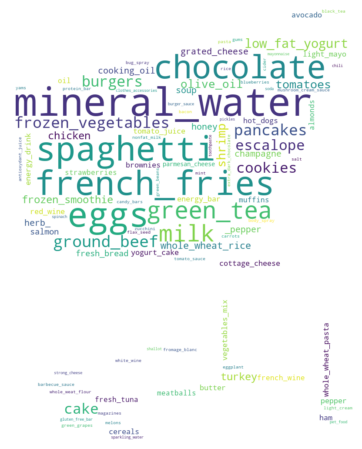

In [18]:
plt.figure(figsize=(20, 8))
plt.imshow(img, interpolation='bilinear')
plt.axis('off')
plt.show()

In [19]:
wc.words_  #  某单词频数 / 其中最大频数 的结果：

{'mineral_water': 1.0,
 'eggs': 0.7539149888143176,
 'spaghetti': 0.7304250559284117,
 'french_fries': 0.7170022371364653,
 'chocolate': 0.6879194630872483,
 'green_tea': 0.5542505592841164,
 'milk': 0.5436241610738255,
 'ground_beef': 0.4121923937360179,
 'frozen_vegetables': 0.39988814317673377,
 'pancakes': 0.3987695749440716,
 'burgers': 0.36577181208053694,
 'cake': 0.3400447427293065,
 'cookies': 0.337248322147651,
 'escalope': 0.3327740492170022,
 'low_fat_yogurt': 0.32102908277404923,
 'shrimp': 0.29977628635346754,
 'tomatoes': 0.28691275167785235,
 'olive_oil': 0.27628635346756153,
 'frozen_smoothie': 0.2656599552572707,
 'turkey': 0.26230425055928414,
 'chicken': 0.2516778523489933,
 'whole_wheat_rice': 0.24552572706935122,
 'grated_cheese': 0.2197986577181208,
 'cooking_oil': 0.21420581655480983,
 'soup': 0.21196868008948547,
 'herb_': 0.20749440715883669,
 '_pepper': 0.20749440715883669,
 'honey': 0.19910514541387025,
 'champagne': 0.19630872483221476,
 'fresh_bread': 0.18

关于词云words_属性的计算，见4.3节的计算过程

In [20]:
len(wc.words_) # 100个词，因为我们设置了词云最多显示前100个词

100

## 保存词云图到本地

In [21]:
wc.to_file('./masket_wordcloud1.png')

## seaborn 绘制频率分布直方图

In [22]:
# 原DataFrame
df

,Items
0,shrimp almonds avocado vegetables_mix green_gr...
1,burgers meatballs eggs
2,chutney
3,turkey avocado
4,mineral_water milk energy_bar whole_wheat_rice...
...,...
7496,butter light_mayo fresh_bread
7497,burgers frozen_vegetables eggs french_fries ma...
7498,chicken
7499,escalope green_tea


In [23]:
one_hot_df = df['Items'].str.get_dummies(sep=' ')

In [24]:
one_hot_df.max(axis=0).max()

1

In [25]:
one_hot_df

,almonds,antioxydant_juice,asparagus,avocado,babies_food,bacon,barbecue_sauce,black_tea,blueberries,body_spray,...,turkey,vegetables_mix,water_spray,white_wine,whole_weat_flour,whole_wheat_pasta,whole_wheat_rice,yams,yogurt_cake,zucchini
0,1,1,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
one_hot_df.columns

Index(['almonds', 'antioxydant_juice', 'asparagus', 'avocado', 'babies_food',
       'bacon', 'barbecue_sauce', 'black_tea', 'blueberries', 'body_spray',
       ...
       'turkey', 'vegetables_mix', 'water_spray', 'white_wine',
       'whole_weat_flour', 'whole_wheat_pasta', 'whole_wheat_rice', 'yams',
       'yogurt_cake', 'zucchini'],
      dtype='object', length=119)

In [27]:
#  one-hot编码后的DataFrame统计的每个商品出现的词频数

freqs = one_hot_df.sum(axis=0)

freqs

almonds              153
antioxydant_juice     67
asparagus             36
avocado              250
babies_food           34
                    ... 
whole_wheat_pasta    221
whole_wheat_rice     439
yams                  86
yogurt_cake          205
zucchini              71
Length: 119, dtype: int64

In [28]:
import seaborn as sns

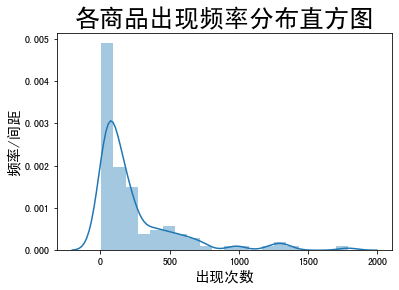

In [29]:
sns.distplot(freqs)

plt.title("各商品出现频率分布直方图", fontsize=25)
plt.xlabel("出现次数", fontsize=15)
plt.ylabel("频率/间距", fontsize=15)

plt.show()

## seaborn 绘制单变量不重叠分类散点图
---
散点的集中程度也可以反映分布情况

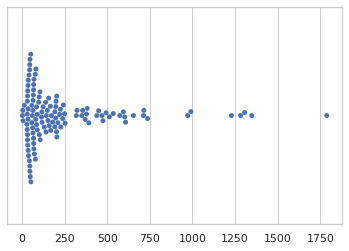

In [30]:
sns.set(style="whitegrid")
sns.swarmplot(x=one_hot_df.sum(axis=0))
plt.show()

**从3.5的分布图看，多数商品出现次数在250以内。3.6的不重叠分类散点图进一步印证了这一点。同时在3.6中，由于散点图的点是不重叠的，所以一个点代表一条数据，可以看出，TOP10的商品出现次数应该在700以上。在7501笔订单中多数商品销量只有不到25次，说明待提升空间高。**

# 统计前10商品

## 用词云统计商品频数

In [31]:
# 将一长段文本切片成单词，并去除stopwords。返回单词（words）和其出现次数的字典格式
result = wc.process_text(text)

In [32]:
result

{'shrimp': 536,
 'almonds': 153,
 'avocado': 250,
 'vegetables_mix': 193,
 'green_grapes': 68,
 'whole_weat_flour': 70,
 'yams': 86,
 'cottage_cheese': 239,
 'energy_drink': 200,
 'tomato_juice': 228,
 'low_fat_yogurt': 574,
 'green_tea': 991,
 'honey': 356,
 'salad': 37,
 'mineral_water': 1788,
 'salmon': 319,
 'antioxydant_juice': 67,
 'frozen_smoothie': 475,
 'spinach': 53,
 'olive_oil': 494,
 'burgers': 654,
 'meatballs': 157,
 'eggs': 1348,
 'chutney': 31,
 'turkey': 469,
 'milk': 972,
 'energy_bar': 203,
 'whole_wheat_rice': 439,
 'whole_wheat_pasta': 221,
 'french_fries': 1282,
 'soup': 379,
 'light_cream': 117,
 'shallot': 58,
 'frozen_vegetables': 715,
 'spaghetti': 1306,
 'pet_food': 49,
 'cookies': 603,
 'cooking_oil': 383,
 'champagne': 351,
 'chocolate': 1230,
 'chicken': 450,
 'oil': 173,
 'fresh_tuna': 167,
 'tomatoes': 513,
 'black_tea': 107,
 'extra_dark_chocolate': 90,
 'protein_bar': 139,
 'red_wine': 211,
 'pasta': 118,
 'pepper': 199,
 'shampoo': 37,
 'rice': 141,


In [33]:
len(result)  # 多出一个商品的原因见4.4

120

## 将top10结果降序排序

In [34]:
# 按照值降序排序
result = sorted(result.items(), key=lambda d : d[1], reverse=True)

In [35]:
result[:10]

[('mineral_water', 1788),
 ('eggs', 1348),
 ('spaghetti', 1306),
 ('french_fries', 1282),
 ('chocolate', 1230),
 ('green_tea', 991),
 ('milk', 972),
 ('ground_beef', 737),
 ('frozen_vegetables', 715),
 ('pancakes', 713)]

---
**印证了根据3.6得出的top10商品的出现次数均高于700次的猜测**

---

## 根据频数生成前十商品的词云图 

In [36]:
wc2 = WordCloud(background_color='black')

In [37]:
# frequencies参数的值需要是字典
freq_img = wc2.generate_from_frequencies(dict(result[:10]))

In [38]:
wc2.words_ # 某单词频数 / 其中的最大频数(即：top1的词频数)

{'mineral_water': 1.0,
 'eggs': 0.7539149888143176,
 'spaghetti': 0.7304250559284117,
 'french_fries': 0.7170022371364653,
 'chocolate': 0.6879194630872483,
 'green_tea': 0.5542505592841164,
 'milk': 0.5436241610738255,
 'ground_beef': 0.4121923937360179,
 'frozen_vegetables': 0.39988814317673377,
 'pancakes': 0.3987695749440716}

In [40]:
mineral_water_freq = result[0][1]
eggs_freq = result[1][1]
print('mineral_water_freq:', mineral_water_freq)
print('eggs_freq:', eggs_freq)
eggs_freq / mineral_water_freq

mineral_water_freq: 1788
eggs_freq: 1348


0.7539149888143176

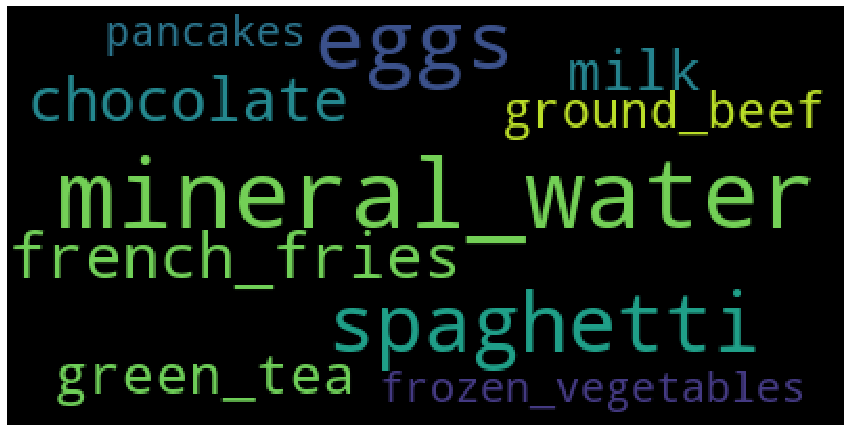

In [41]:
plt.figure(figsize=(15, 8))
plt.imshow(freq_img)
plt.axis('off')
plt.show()

## 校验词云生成的频数是否正确

In [42]:
# 将ohe-hot编码的df统计的频数结果降序排序
freqs = freqs.sort_values(ascending=False)

In [43]:
freqs[:10]

mineral_water        1788
eggs                 1348
spaghetti            1306
french_fries         1282
chocolate            1229
green_tea             991
milk                  972
ground_beef           737
frozen_vegetables     715
pancakes              713
dtype: int64

chocolate相差1次

### freqs商品数119，result商品数120原因：

In [44]:
freqs.shape  

(119,)

In [45]:
len(result)

120

In [46]:
for r in result:
    if r[0] not in freqs.index:
        print(r)

('herb_', 371)
('_pepper', 371)


In [47]:
one_hot_df['herb_&_pepper'].sum()

371

<font color='red'>**4.4结论：从前面4个代码块来看，词云把`&`符号当做分隔符进行了单词分割。所以词云得到的结果中商品数多了一个。**<font/>

### 绘制TOP10商品出现次数条形图

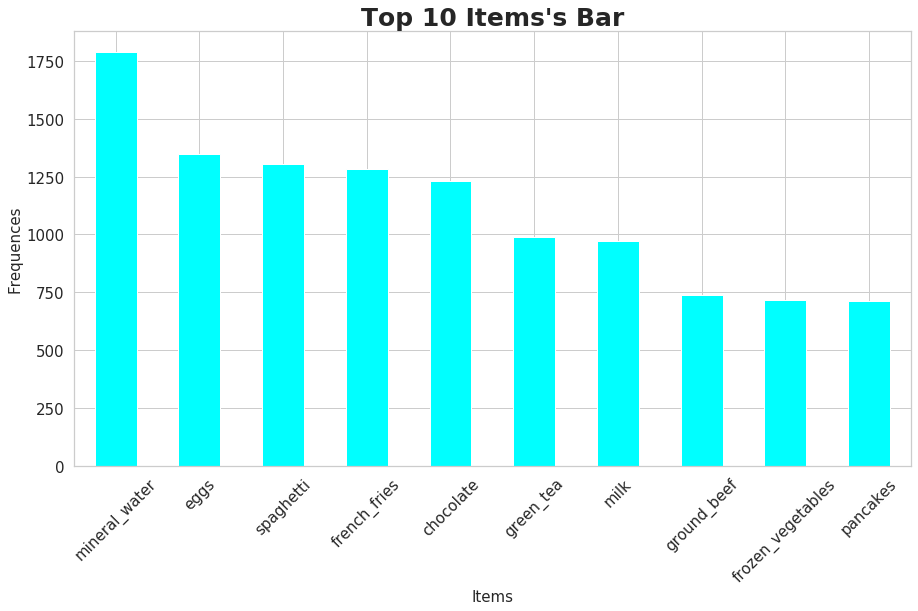

In [48]:
freqs[:10].plot(kind='bar', 
                rot=45,
                color='cyan',
                figsize=(15, 8),
                fontsize=15
               )
plt.title("Top 10 Items's Bar", fontsize=25, fontweight='heavy')
plt.xlabel('Items', fontsize=15)
plt.ylabel('Frequences', fontsize=15)
plt.show()

### 用Counter统计词频

In [49]:
from collections import Counter

In [51]:
text[:100]

'shrimp almonds avocado vegetables_mix green_grapes whole_weat_flour yams cottage_cheese energy_drink'

In [52]:
all_words = text.split()
all_words

['shrimp',
 'almonds',
 'avocado',
 'vegetables_mix',
 'green_grapes',
 'whole_weat_flour',
 'yams',
 'cottage_cheese',
 'energy_drink',
 'tomato_juice',
 'low_fat_yogurt',
 'green_tea',
 'honey',
 'salad',
 'mineral_water',
 'salmon',
 'antioxydant_juice',
 'frozen_smoothie',
 'spinach',
 'olive_oil',
 'burgers',
 'meatballs',
 'eggs',
 'chutney',
 'turkey',
 'avocado',
 'mineral_water',
 'milk',
 'energy_bar',
 'whole_wheat_rice',
 'green_tea',
 'low_fat_yogurt',
 'whole_wheat_pasta',
 'french_fries',
 'soup',
 'light_cream',
 'shallot',
 'frozen_vegetables',
 'spaghetti',
 'green_tea',
 'french_fries',
 'eggs',
 'pet_food',
 'cookies',
 'turkey',
 'burgers',
 'mineral_water',
 'eggs',
 'cooking_oil',
 'spaghetti',
 'champagne',
 'cookies',
 'mineral_water',
 'salmon',
 'mineral_water',
 'shrimp',
 'chocolate',
 'chicken',
 'honey',
 'oil',
 'cooking_oil',
 'low_fat_yogurt',
 'turkey',
 'eggs',
 'turkey',
 'fresh_tuna',
 'tomatoes',
 'spaghetti',
 'mineral_water',
 'black_tea',
 'sal

In [53]:
set(all_words)

{'almonds',
 'antioxydant_juice',
 'asparagus',
 'avocado',
 'babies_food',
 'bacon',
 'barbecue_sauce',
 'black_tea',
 'blueberries',
 'body_spray',
 'bramble',
 'brownies',
 'bug_spray',
 'burger_sauce',
 'burgers',
 'butter',
 'cake',
 'candy_bars',
 'carrots',
 'cauliflower',
 'cereals',
 'champagne',
 'chicken',
 'chili',
 'chocolate',
 'chocolate_bread',
 'chutney',
 'cider',
 'clothes_accessories',
 'cookies',
 'cooking_oil',
 'corn',
 'cottage_cheese',
 'cream',
 'dessert_wine',
 'eggplant',
 'eggs',
 'energy_bar',
 'energy_drink',
 'escalope',
 'extra_dark_chocolate',
 'flax_seed',
 'french_fries',
 'french_wine',
 'fresh_bread',
 'fresh_tuna',
 'fromage_blanc',
 'frozen_smoothie',
 'frozen_vegetables',
 'gluten_free_bar',
 'grated_cheese',
 'green_beans',
 'green_grapes',
 'green_tea',
 'ground_beef',
 'gums',
 'ham',
 'hand_protein_bar',
 'herb_&_pepper',
 'honey',
 'hot_dogs',
 'ketchup',
 'light_cream',
 'light_mayo',
 'low_fat_yogurt',
 'magazines',
 'mashed_potato',
 'ma

In [54]:
len(set(all_words))

119

In [55]:
freq_dict = Counter(all_words)

In [56]:
freq_dict

Counter({'shrimp': 536,
         'almonds': 153,
         'avocado': 250,
         'vegetables_mix': 193,
         'green_grapes': 68,
         'whole_weat_flour': 70,
         'yams': 86,
         'cottage_cheese': 239,
         'energy_drink': 200,
         'tomato_juice': 228,
         'low_fat_yogurt': 574,
         'green_tea': 991,
         'honey': 356,
         'salad': 37,
         'mineral_water': 1788,
         'salmon': 319,
         'antioxydant_juice': 67,
         'frozen_smoothie': 475,
         'spinach': 53,
         'olive_oil': 494,
         'burgers': 654,
         'meatballs': 157,
         'eggs': 1348,
         'chutney': 31,
         'turkey': 469,
         'milk': 972,
         'energy_bar': 203,
         'whole_wheat_rice': 439,
         'whole_wheat_pasta': 221,
         'french_fries': 1282,
         'soup': 379,
         'light_cream': 117,
         'shallot': 58,
         'frozen_vegetables': 715,
         'spaghetti': 1306,
         'pet_food': 49,
     

In [57]:
freq_dict = dict(sorted(freq_dict.items(), key=lambda x: x[1], reverse=True))

In [58]:
freq_dict  # Counter统计时，'herb_&_pepper'会当做完整商品统计

{'mineral_water': 1788,
 'eggs': 1348,
 'spaghetti': 1306,
 'french_fries': 1282,
 'chocolate': 1230,
 'green_tea': 991,
 'milk': 972,
 'ground_beef': 737,
 'frozen_vegetables': 715,
 'pancakes': 713,
 'burgers': 654,
 'cake': 608,
 'cookies': 603,
 'escalope': 595,
 'low_fat_yogurt': 574,
 'shrimp': 536,
 'tomatoes': 513,
 'olive_oil': 494,
 'frozen_smoothie': 475,
 'turkey': 469,
 'chicken': 450,
 'whole_wheat_rice': 439,
 'grated_cheese': 393,
 'cooking_oil': 383,
 'soup': 379,
 'herb_&_pepper': 371,
 'honey': 356,
 'champagne': 351,
 'fresh_bread': 323,
 'salmon': 319,
 'brownies': 253,
 'avocado': 250,
 'hot_dogs': 243,
 'cottage_cheese': 239,
 'tomato_juice': 228,
 'butter': 226,
 'whole_wheat_pasta': 221,
 'red_wine': 211,
 'yogurt_cake': 205,
 'light_mayo': 204,
 'energy_bar': 203,
 'ham': 203,
 'energy_drink': 200,
 'pepper': 199,
 'vegetables_mix': 193,
 'cereals': 193,
 'muffins': 181,
 'oil': 173,
 'french_wine': 169,
 'fresh_tuna': 167,
 'strawberries': 160,
 'meatballs': 

In [59]:
len(freq_dict)

119

# 分析频数不一致的原因——one-hot统计词频小于Counter、词云统计结果：

In [60]:
have_chocolate = one_hot_df['chocolate'][one_hot_df['chocolate'] == 1]

In [61]:
have_chocolate

16      1
20      1
28      1
31      1
33      1
       ..
7478    1
7481    1
7482    1
7486    1
7492    1
Name: chocolate, Length: 1229, dtype: int64

In [62]:
dict(result)['chocolate']

1230

In [63]:
freq_dict['chocolate']

1230

---
可以看到商品chocolate在one-hot编码的DataFrame中，有1229次，但前面词云和Counter统计的结果均为1230。下面开始尝试查明原因：

---

## 先排查one-hot编码结果时是否漏记——结论：没有：
---
Items由于是整列读取进来的，中间进行了几次字符串替换，和原始整行读入数组进行比对，校验是否有漏计行，最终结论：没有出现漏记行

In [66]:
# 按照相同行索引拼接列
join_df = df.join(one_hot_df)

In [65]:
join_df

,Items,almonds,antioxydant_juice,asparagus,avocado,babies_food,bacon,barbecue_sauce,black_tea,blueberries,...,turkey,vegetables_mix,water_spray,white_wine,whole_weat_flour,whole_wheat_pasta,whole_wheat_rice,yams,yogurt_cake,zucchini
0,shrimp almonds avocado vegetables_mix green_gr...,1,1,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,burgers meatballs eggs,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,chutney,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,turkey avocado,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,mineral_water milk energy_bar whole_wheat_rice...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter light_mayo fresh_bread,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7497,burgers frozen_vegetables eggs french_fries ma...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7498,chicken,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7499,escalope green_tea,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
# 找到包含chocolate的商品名
names = [names for names in one_hot_df.columns if 'chocolate' in names]
names

['chocolate', 'chocolate_bread', 'extra_dark_chocolate']

In [68]:
names.append('Items')

In [69]:
# 列表形式传入多列索引，提取多列
join_df = join_df[names]

In [70]:
join_df

,chocolate,chocolate_bread,extra_dark_chocolate,Items
0,0,0,0,shrimp almonds avocado vegetables_mix green_gr...
1,0,0,0,burgers meatballs eggs
2,0,0,0,chutney
3,0,0,0,turkey avocado
4,0,0,0,mineral_water milk energy_bar whole_wheat_rice...
...,...,...,...,...
7496,0,0,0,butter light_mayo fresh_bread
7497,0,0,0,burgers frozen_vegetables eggs french_fries ma...
7498,0,0,0,chicken
7499,0,0,0,escalope green_tea


In [72]:
# chocolate列中没有出现chocolate的订单
filtered_df = join_df[join_df['chocolate'] == 0]
filtered_df

,chocolate,chocolate_bread,extra_dark_chocolate,Items
0,0,0,0,shrimp almonds avocado vegetables_mix green_gr...
1,0,0,0,burgers meatballs eggs
2,0,0,0,chutney
3,0,0,0,turkey avocado
4,0,0,0,mineral_water milk energy_bar whole_wheat_rice...
...,...,...,...,...
7496,0,0,0,butter light_mayo fresh_bread
7497,0,0,0,burgers frozen_vegetables eggs french_fries ma...
7498,0,0,0,chicken
7499,0,0,0,escalope green_tea


In [73]:
# 查下是否有漏记订单
index_list = []
for i, substr in enumerate(filtered_df['Items'].tolist()):
    for s in substr.split():
        if s =='chocolate':
            index_list.append(i)
print('Done!')    

Done!


In [74]:
index_list

[]

---
**用整行读入的df没有找到漏计chocolate的行。少了的原因猜测可能是单笔订单中存在重复商品。**

---

## 排查是否行内有重复元素：
---

In [75]:
df = pd.read_csv('./data/Market_Basket_Optimisation.csv', 
                 header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
(df == 'chocolate').sum()

0     391
1     223
2     174
3     143
4     115
5      71
6      36
7      38
8      18
9      11
10      6
11      3
12      0
13      0
14      0
15      1
16      0
17      0
18      0
19      0
dtype: int64

In [77]:
(df == 'chocolate').sum().sum()

1230

可以确定表中一共有1230个chocolate。

In [78]:
df.columns = ['col_%d' % i for i in range(df.shape[1])]

In [79]:
df.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
# 构建查询条件表达式
expr = ["col_%d == 'chocolate' " % i for i in range(16) if i not in [12, 13, 14]]
expr

["col_0 == 'chocolate' ",
 "col_1 == 'chocolate' ",
 "col_2 == 'chocolate' ",
 "col_3 == 'chocolate' ",
 "col_4 == 'chocolate' ",
 "col_5 == 'chocolate' ",
 "col_6 == 'chocolate' ",
 "col_7 == 'chocolate' ",
 "col_8 == 'chocolate' ",
 "col_9 == 'chocolate' ",
 "col_10 == 'chocolate' ",
 "col_11 == 'chocolate' ",
 "col_15 == 'chocolate' "]

In [81]:
expr_ = 'or '.join(expr)
expr_

"col_0 == 'chocolate' or col_1 == 'chocolate' or col_2 == 'chocolate' or col_3 == 'chocolate' or col_4 == 'chocolate' or col_5 == 'chocolate' or col_6 == 'chocolate' or col_7 == 'chocolate' or col_8 == 'chocolate' or col_9 == 'chocolate' or col_10 == 'chocolate' or col_11 == 'chocolate' or col_15 == 'chocolate' "

In [82]:
filter_df = df.query(expr_)
filter_df.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19
16,shrimp,chocolate,chicken,honey,oil,cooking oil,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,red wine,shrimp,pasta,pepper,eggs,chocolate,shampoo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,mineral water,eggs,chicken,chocolate,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,mineral water,chocolate,avocado,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,frozen vegetables,strong cheese,chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
filter_df = filter_df[['col_%d' % i for i in range(16) if i not in [12, 13, 14]]]

In [84]:
filter_df

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_15
16,shrimp,chocolate,chicken,honey,oil,cooking oil,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN
20,red wine,shrimp,pasta,pepper,eggs,chocolate,shampoo,NaN,NaN,NaN,NaN,NaN,NaN
28,mineral water,eggs,chicken,chocolate,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,mineral water,chocolate,avocado,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,frozen vegetables,strong cheese,chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7478,turkey,ground beef,mineral water,chocolate,soup,pancakes,whole wheat rice,light cream,carrots,mayonnaise,NaN,NaN,NaN
7481,chocolate,shrimp,pasta,spaghetti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7482,chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7486,red wine,tomato sauce,spaghetti,chocolate,olive oil,french fries,salt,asparagus,NaN,NaN,NaN,NaN,NaN


In [90]:
filter_df.iloc[0].dropna().duplicated() # 查看该行是否有重复值

col_0    False
col_1    False
col_2    False
col_3    False
col_4    False
col_5    False
col_6    False
Name: 16, dtype: bool

In [87]:
# 查看chocolate重复出现的行
for i in range(filter_df.shape[0]):
    row = filter_df.iloc[i].dropna()
    # 该行假如有重复行，则打印结果
    if row.duplicated().sum() >= 1:
        print("出现重复行，索引及行内非空元素如下:")
        print("原始df中的行索引号为:", filter_df.index[i])
        print("filter_df中的行索引及元素如下:", i)
        print(row)

出现重复行，索引及行内非空元素如下:
原始df中的行索引号为: 6903
filter_df中的行索引及元素如下: 1138
col_0        ground beef
col_1          spaghetti
col_2      mineral water
col_3          chocolate
col_4             salmon
col_5            chicken
col_6          chocolate
col_7    frozen smoothie
Name: 6903, dtype: object


In [88]:
# 打印出df中所有非空元素重复的行索引和非空元素
for i in range(df.shape[0]):
    row = df.iloc[i].dropna().tolist()
    if len(row) != len(set(row)):
        print("出现重复行，索引及行内非空元素如下:")
        print(i, row)
        print("重复元素:", [i for i in row if row.count(i) > 1])
        print('*' * 100)

出现重复行，索引及行内非空元素如下:
4394 ['burgers', 'ham', 'eggs', 'whole wheat rice', 'ham', 'french fries', 'cookies', 'green tea']
重复元素: ['ham', 'ham']
****************************************************************************************************
出现重复行，索引及行内非空元素如下:
4494 ['ham', 'eggs', 'honey', 'gums', 'light cream', 'ham']
重复元素: ['ham', 'ham']
****************************************************************************************************
出现重复行，索引及行内非空元素如下:
4526 ['ham', 'milk', 'chicken', 'whole wheat rice', 'ham', 'eggplant']
重复元素: ['ham', 'ham']
****************************************************************************************************
出现重复行，索引及行内非空元素如下:
6903 ['ground beef', 'spaghetti', 'mineral water', 'chocolate', 'salmon', 'chicken', 'chocolate', 'frozen smoothie']
重复元素: ['chocolate', 'chocolate']
****************************************************************************************************
出现重复行，索引及行内非空元素如下:
7109 ['ham', 'shrimp', 'milk', 'flax seed', 'salmon', 'cor

---
**经过一系列的查找，最终确认，导致one-hot编码的df统计的词频数少于Counter()和wc.process_text()的原因，确实是因为行内有重复元素，且不仅chocolate一个商品，另外还有ham这个商品也在4行中出现了重复。**

---

因为通过Series.str.get_dummies()对Series进行one-hot编码时，相同行号的相同商品，不会重复计算，只会计算一次。而Counter()和wc.process_text()方法，由于接收的是我们合并后的整个字符串，如果合并字符串前没有进行行内去重，则同一个行内的相同商品(也就是同一个订单内的相同商品)重复的次数也被计入了频数的统计中。

在实际应用中，如果我们只想统计商品出现在多少笔订单中，则可以使用Series.str.get_dummies()进行统计，或者去重后合并为字符串、再调用Counter()或wc.process_text()方法进行统计。

---
#  总结：
---


1. **词云可视化中：**
    - `WordCloud(max_words).generate(text)` ,会显示text字符串中，前max_words个词；
    - `WordCloud()`方法中参数`collocations`最好设为`False`，否则`text`中相同的词可能会被当做重复词而不计算，导致单词排名不准；
    - `WordCloud().generate_from_frequencies(freq)` 可以根据 `{商品:频数}`的字典生成词云图；
    - `WordCloud().process_text(text)` 可以从一整串字符串中统计出每个空格隔开的单词出现的频数，并以`{商品:频数}`的字典形式返回；
    - `generate_from_frequencies()、process_text()`连用所得到的结果，与generate()的结果相同，不同的地方在于，我们可以在`process_text()`的结果中得到它们的频数。

2. seaborn 绘制直方图默认会显示密度分布曲线，比Matplotlib更加直观

3. 经过5中检查频数不一致的分析，发现：
    - collections.Counter()也是个批量统计字符串中每个单词词频的好方法；
    - 需要注意的是，wc.process_text()在统计词频时，它会将字符串中的`&`符号作为分隔符，如果不想被拆分，需要提前将该符号替换为其他词，如:'and'或 '_'。
    - Series.str.get_dummies()进行one-hot编码时，行内重复元素只记录一次。